In [4]:
import os
import sys
sys.path.append("/mnt/d/aspiranture/code/sat_image_segmentation")
import dataset_tool.dataset6_generator

In [5]:
import importlib

In [6]:
import dataset_6_binary_tree
importlib.reload(dataset_6_binary_tree)
import dataset_tool.binary_helper
importlib.reload(dataset_tool.binary_helper)

<module 'dataset_tool.binary_helper' from '/mnt/d/aspiranture/code/sat_image_segmentation/dataset_tool/binary_helper.py'>

1. Import all needed libaries and setup categories binary tree for learning

In [7]:
categories = ["water", "forest", "fields", "city"]

Get combination of all possible binary trees

In [8]:
possible_trees = dataset_tool.binary_helper.return_possible_trees(categories)

In [9]:
possible_trees

[['water', ['forest', ['fields', 'city']]],
 ['water', ['forest', ['city', 'fields']]],
 ['water', ['fields', ['forest', 'city']]],
 ['water', ['fields', ['city', 'forest']]],
 ['water', ['city', ['forest', 'fields']]],
 ['water', ['city', ['fields', 'forest']]],
 ['forest', ['water', ['fields', 'city']]],
 ['forest', ['water', ['city', 'fields']]],
 ['forest', ['fields', ['water', 'city']]],
 ['forest', ['fields', ['city', 'water']]],
 ['forest', ['city', ['water', 'fields']]],
 ['forest', ['city', ['fields', 'water']]],
 ['fields', ['water', ['forest', 'city']]],
 ['fields', ['water', ['city', 'forest']]],
 ['fields', ['forest', ['water', 'city']]],
 ['fields', ['forest', ['city', 'water']]],
 ['fields', ['city', ['water', 'forest']]],
 ['fields', ['city', ['forest', 'water']]],
 ['city', ['water', ['forest', 'fields']]],
 ['city', ['water', ['fields', 'forest']]],
 ['city', ['forest', ['water', 'fields']]],
 ['city', ['forest', ['fields', 'water']]],
 ['city', ['fields', ['water', '

In [10]:
categories_tree_1 = ["water",["forest",["fields", "city"]]]

In [11]:
odd_indexes = [element for i, element in enumerate(possible_trees) if i % 2 != 0]

**We should also decrease the number of variations up to 2 times, because the last iteration will be the same**

In [14]:
odd_indexes

[['water', ['forest', ['city', 'fields']]],
 ['water', ['fields', ['city', 'forest']]],
 ['water', ['city', ['fields', 'forest']]],
 ['forest', ['water', ['city', 'fields']]],
 ['forest', ['fields', ['city', 'water']]],
 ['forest', ['city', ['fields', 'water']]],
 ['fields', ['water', ['city', 'forest']]],
 ['fields', ['forest', ['city', 'water']]],
 ['fields', ['city', ['forest', 'water']]],
 ['city', ['water', ['fields', 'forest']]],
 ['city', ['forest', ['fields', 'water']]],
 ['city', ['fields', ['forest', 'water']]]]

## 2. Load and initialize dataset

In [16]:
ds = dataset_6_binary_tree.Dataset6BinaryTree(categories_tree_1)

In [17]:
ds.initialize()

Error read []
len 27


Recheck if only supported categories has been included

In [18]:
ds.get_supported_categories()

['water', 'forest', 'fields', 'city']

In [19]:
ds.supported_categories_map

3. Create binary models 

In [20]:
ds.create_models()

Entering into iteration 1


2023-11-12 17:46:28.644262: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 17:46:29.010847: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 17:46:29.010909: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 17:46:29.019802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 17:46:29.019887: I tensorflow/compile

Iteration 1 creating new arrays
Iteration 1 calcualte weights
Entering into iteration 2
Iteration 2 creating new arrays
Iteration 2 calcualte weights
Entering into iteration 3
Iteration 3 creating new arrays
Iteration 3 calcualte weights


In [21]:
validation_dataset = ds.load_custom_verification_dataset("/mnt/d/shared_folder/test_images2_fixed/")

len 3


## <span style="color:orange">**Get accuracy result from another pictures, which is not splitted with current dataset**</span> 

In [22]:
import numpy as np

In [23]:
## create predictions for validation dataset
custom_validation_y = []
custom_validation_x = []
for key, value in validation_dataset.items():
    catogory_number = ds.supported_categories_map[key]
    y_data_custom = np.full(value.shape[1], catogory_number)
    custom_validation_y.extend(y_data_custom)
    custom_validation_x.append(value)

In [24]:
custom_validation_y_np = np.asarray(custom_validation_y)
custom_validation_x_1 = np.hstack(custom_validation_x)
custom_validation_x_np = np.moveaxis(custom_validation_x_1, 0, 1)

In [25]:
custom_validation_prediction = ds.predict_custom_validation_data(custom_validation_x_np)

114/114 [==============================] - 0s 3ms/step


In [28]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
accuracy_score(custom_validation_prediction[-1], custom_validation_y_np)

0.9421425645337054

<span style="color: orange"><i>As we see the custom validation data has the same accuracy as data separated from test</i></span>

In [144]:
classification_report(custom_validation_prediction[-1], custom_validation_y_np, output_dict=True)

{'1': {'precision': 0.9958471795957244,
  'recall': 0.9927557577082434,
  'f1-score': 0.9942990657365735,
  'support': 1184803.0},
 '2': {'precision': 0.9349052346570397,
  'recall': 0.8572463018516603,
  'f1-score': 0.8943931789973558,
  'support': 77336.0},
 '3': {'precision': 0.678353377054258,
  'recall': 0.8811959330846965,
  'f1-score': 0.7665833111762548,
  'support': 129238.0},
 '4': {'precision': 0.6922245636786081,
  'recall': 0.49959540220920146,
  'f1-score': 0.58034303705004,
  'support': 102571.0},
 'accuracy': 0.9422309210226862,
 'macro avg': {'precision': 0.8253325887464076,
  'recall': 0.8076983487134504,
  'f1-score': 0.808904648240056,
  'support': 1493948.0},
 'weighted avg': {'precision': 0.9443807660097986,
  'recall': 0.9422309210226862,
  'f1-score': 0.9410068934768047,
  'support': 1493948.0}}

5. Make validation wit a test data which not icnluded to train sample But htis data **<span style="color: red">has been splited from original dataset</span>**

In [33]:
results = ds.validate_with_test_data()

792/792 [==============================] - 2s 3ms/step
Binary acccucary for step 1 is 99.4%.
Calcaluting accuracy for 2 categories
Adding idxes for category 1: [      0       1       2 ... 1620627 1620628 1620630]
Total acccucary for step 1 is 99.4%.
306/306 [==============================] - 1s 3ms/step
Binary acccucary for step 2 is 97.19%.
Calcaluting accuracy for 3 categories
Adding idxes for category 2: [     11      16      35 ... 1620595 1620613 1620625]
Total acccucary for step 2 is 98.35000000000001%.
194/194 [==============================] - 1s 3ms/step
Binary acccucary for step 3 is 81.69999999999999%.
Calcaluting accuracy for 4 categories
Adding idxes for category 3: [     12      24      28 ... 1620603 1620620 1620629]
Total acccucary for step 3 is 93.97999999999999%.


In [32]:
def generate_data_for_binary_hystograms(data):
    lst = []
    for indx, itm in enumerate(data):
        if (indx +1 == len(data)):
            lst.append(itm[:, 0])
            lst.append(itm[:, 1])
        else:
            lst.append(itm[:, 0])
    return lst

In [34]:
generated_hysts = generate_data_for_binary_hystograms(results)

TypeError: 'BinaryTreeVerificationModel' object is not subscriptable

In [35]:
len(generated_hysts)

NameError: name 'generated_hysts' is not defined

In [93]:
import matplotlib.pyplot as plt
import numpy as np

In [94]:
def createHistGraph(probalities, categories_map):
    """
    Creates histgram for propalities
    :param probalities: probabilites list
    :param categories_map: legend map to transform numbers to human-readable categories
    :return: None
    """
    fig, axs = plt.subplots(len(probalities))

    for category in range(len(probalities)):
        col = (np.random.random(), np.random.random(), np.random.random())
        axs[category].hist(probalities[category], color=col, range=(1/len(probalities), 1.01), label=list(categories_map.keys())[category])
        axs[category].legend()

### Hystogram of ierachical binary classier

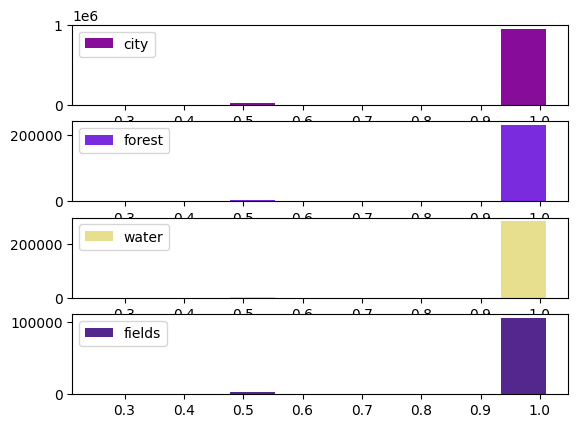

In [95]:
createHistGraph(generated_hysts, ds.supported_categories_map)

### Check for all possible binary trees to check the best accuracy on it

This part of file check for each possible binary trees categories layout and then makes a table with accuracy for each category to check which layout is the best

In [36]:
models = []

In [ ]:
for tree in odd_indexes:
    print(f"do for iteration: {tree}")
    ds_i = dataset_6_binary_tree.Dataset6BinaryTree(tree)
    ds_i.initialize()
    ds_i.get_supported_categories()
    ds_i.create_models()
    pred = ds_i.validate_with_test_data()
    models.append((ds_i, pred))

do for iteration: ['water', ['forest', ['city', 'fields']]]
Error read []
len 27
Entering into iteration 1
Iteration 1 creating new arrays
Iteration 1 calcualte weights
Entering into iteration 2
Iteration 2 creating new arrays
Iteration 2 calcualte weights
Entering into iteration 3
Iteration 3 creating new arrays
Iteration 3 calcualte weights
792/792 [==============================] - 3s 3ms/step
Binary acccucary for step 1 is 99.4%.
Calcaluting accuracy for 2 categories
Adding idxes for category 1: [      0       1       5 ... 1620626 1620628 1620629]
Total acccucary for step 1 is 99.4%.
306/306 [==============================] - 1s 3ms/step
Binary acccucary for step 2 is 97.13000000000001%.
Calcaluting accuracy for 3 categories
Adding idxes for category 2: [      2       3       6 ... 1620604 1620611 1620614]
Total acccucary for step 2 is 98.33%.
194/194 [==============================] - 1s 3ms/step
Binary acccucary for step 3 is 81.67%.
Calcaluting accuracy for 4 categories
Adding 

In [ ]:
from sklearn.metrics import  accuracy_score, classification_report
import numpy as np

In [78]:
prediction_data_report = []

for model in models:
    last_predictions = model[1][-1]
    supported_categories = model[0].get_supported_categories()
    print(f"Supported categories: {supported_categories}")
    current_categories_map = model[0].supported_categories_map
    print(f"Current categories map: {current_categories_map}")
    acc_map = {}
    acc_score_total = accuracy_score(last_predictions.array_of_categories, last_predictions.y_test)
    acc_map["total"] = acc_score_total
    print(f"Accuracy score: {acc_score_total}")
    classification_rep = classification_report(last_predictions.array_of_categories, last_predictions.y_test, output_dict=True)
    #prediction_data_report.append(classification_rep)
    # create precision map for each category and total
    
    for category_idx in range(len(supported_categories)):
        current_category_value = list(current_categories_map.values())[category_idx]
        current_category_key = list(current_categories_map.keys())[category_idx]
        acc_score_for_category = classification_rep[f"{current_category_value}"]['precision']
        ## round num to .00 and multiply it to 100
        acc_score_for_category = round(acc_score_for_category, 2) * 100
        acc_map[current_category_key] = acc_score_for_category
    
    prediction_data_report.append(acc_map)
    

Supported categories: ['water', 'forest', 'city', 'fields']
Current categories map: {'water': 1, 'forest': 2, 'city': 3, 'fields': 4}
Accuracy score: 0.9398036937464481
Supported categories: ['water', 'fields', 'city', 'forest']
Current categories map: {'water': 1, 'fields': 2, 'city': 3, 'forest': 4}
Accuracy score: 0.9394717242851705
Supported categories: ['water', 'city', 'fields', 'forest']
Current categories map: {'water': 1, 'city': 2, 'fields': 3, 'forest': 4}
Accuracy score: 0.9396222829256012
Supported categories: ['forest', 'water', 'city', 'fields']
Current categories map: {'forest': 1, 'water': 2, 'city': 3, 'fields': 4}
Accuracy score: 0.9394137221859881
Supported categories: ['forest', 'fields', 'city', 'water']
Current categories map: {'forest': 1, 'fields': 2, 'city': 3, 'water': 4}
Accuracy score: 0.9397253292081912
Supported categories: ['forest', 'city', 'fields', 'water']
Current categories map: {'forest': 1, 'city': 2, 'fields': 3, 'water': 4}
Accuracy score: 0.939

In [81]:
prediction_data_report_np = np.asarray(prediction_data_report)

In [97]:
colums_map = {}
for sup_category in prediction_data_report[0].keys():
    category_values = [s[sup_category] for s in prediction_data_report]
    colums_map[sup_category] = category_values

In [84]:
import pandas as pd

In [99]:
data_frame = pd.DataFrame(colums_map)

In [91]:
data_frame_indexes = [",".join(s[0].get_supported_categories()) for s in models]

In [92]:
#data_frame_indexes

['water,forest,city,fields',
 'water,fields,city,forest',
 'water,city,fields,forest',
 'forest,water,city,fields',
 'forest,fields,city,water',
 'forest,city,fields,water',
 'fields,water,city,forest',
 'fields,forest,city,water',
 'fields,city,forest,water',
 'city,water,fields,forest',
 'city,forest,fields,water',
 'city,fields,forest,water']

In [101]:
data_frame.index = data_frame_indexes

In [102]:
data_frame

,total,water,forest,city,fields
"water,forest,city,fields",0.939804,100.0,96.0,83.0,64.0
"water,fields,city,forest",0.939472,100.0,64.0,83.0,96.0
"water,city,fields,forest",0.939622,100.0,64.0,96.0,83.0
"forest,water,city,fields",0.939414,96.0,100.0,83.0,64.0
"forest,fields,city,water",0.939725,64.0,100.0,83.0,96.0
"forest,city,fields,water",0.939768,64.0,100.0,96.0,83.0
"fields,water,city,forest",0.939698,96.0,64.0,83.0,100.0
"fields,forest,city,water",0.939729,64.0,96.0,83.0,100.0
"fields,city,forest,water",0.939997,65.0,83.0,96.0,100.0
"city,water,fields,forest",0.939554,96.0,64.0,100.0,83.0


## Use multicategorial classifier

In [97]:
import tensorflow as tf

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
from tensorflow.keras.layers import *
import layers.naive_bayes
importlib.reload(layers.naive_bayes)
# from keras.models import Model, save_model
# from keras.layers import Input

# Create the model
# model_new_1 = tf.keras.models.Sequential()
# model_new_1.add(tf.keras.models.InputLayer(shape=(12,)))  # Input layer
# model_new_1.add(layers.naive_bayes.MultiClassNaiveBayesLayer(num_features=12, num_of_categories=7))  # Naive Bayes layer
# model_new_1.add(tf.keras.models.Softmax())  #

model_new_gnb = tf.keras.models.Sequential([
    layers.naive_bayes.MultiClassNaiveBayesLayer(num_features=12, num_of_categories=4, input_shape=(12,)),
    Activation("softmax")
    ])


In [100]:
model_new_gnb.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','mse'])
model_new_gnb.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 multi_class_naive_bayes_la  (None, 4)                 96        
 yer_9 (MultiClassNaiveBaye                                      
 sLayer)                                                         
                                                                 
 activation_9 (Activation)   (None, 4)                 0         
                                                                 
Total params: 96 (384.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 96 (384.00 Byte)
_________________________________________________________________


In [101]:
import numpy as np

Crop dataset and transform it to use only 4 categories. Remap labels to fit binary dataset

In [102]:
y_int_labels = ds.y_train_new.copy()
y_int_labels = y_int_labels-1
means = []
variances = []

num_classes = 4  # or however many you have

for i in range(num_classes):
    means.append(np.mean(ds.x_train_new[y_int_labels == i], axis=0))
    variances.append(np.var(ds.x_train_new[y_int_labels == i], axis=0))

means = np.array(means)
variances = np.array(variances)

In [103]:
model_new_gnb.layers[0].set_weights([means, variances])

In [104]:
pred_res = model_new_gnb.predict(ds.x_test_new, batch_size=2048)

792/792 [==============================] - 3s 3ms/step


In [127]:
predd = []

for iii in range(pred_res.shape[1]):
    predd.append(pred_res[:, iii])

### Hystogram of multiclass classier

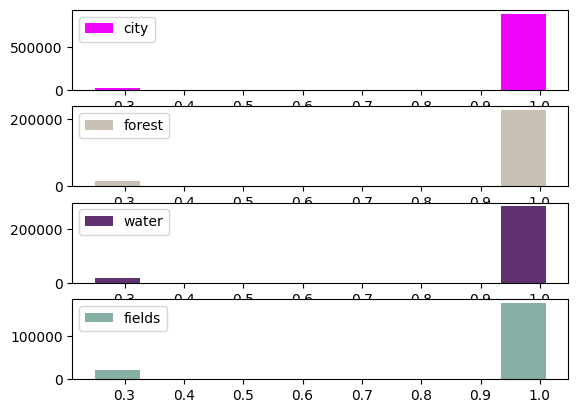

In [128]:
createHistGraph(predd, ds.supported_categories_map)

In [105]:
pred_res_vec = tf.argmax(pred_res, axis=-1).numpy()

In [106]:
pred_res_vec = pred_res_vec + 1

Detect accuacy for multiclass classifier

In [108]:
accuracy_score(pred_res_vec, ds.y_test_new)

0.8965119141865113

## Load image and display how it works on it

In [109]:
image_1 = ds.load_image("/mnt/d/shared_folder/test_images2/*B?*.tiff")

In [110]:
image_1.shape

(733, 1250, 12)

### Binary

In [112]:
image_1_p, image_1_i = ds.predict_image(image_1)

448/448 [==============================] - 1s 3ms/step
Adding idxes for category 1: [   670    671    672 ... 916247 916248 916249]
236/236 [==============================] - 1s 3ms/step
Adding idxes for category 2: [     0      3     71 ... 915308 915328 915329]
218/218 [==============================] - 1s 3ms/step
Adding idxes for category 3: [    41     73    132 ... 915225 915291 915292]


In [113]:
image_1_i[-1].shape

(916250,)

In [114]:
image_to_display = image_1_i[-1].reshape(733,1250)

In [115]:
image_to_display.min()

1

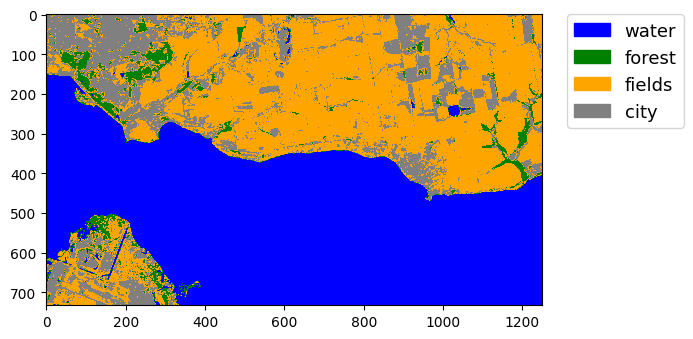

In [116]:
from matplotlib.colors import ListedColormap
import earthpy.plot as ep
import matplotlib.pyplot as plt

im = plt.imshow(image_to_display,
           vmin=1,vmax=6,
               cmap=ListedColormap(['blue', 'green', 'orange', 'grey', 'yellow','brown']))
ep.draw_legend(im_ax = im, titles = ["water","forest","fields","city"])


plt.show()

## Multiclass

In [117]:
image_1_vector = image_1.reshape(image_1.shape[0]*image_1.shape[1],12)

In [118]:
image_1_multi = model_new_gnb.predict(image_1_vector, batch_size=2048)

448/448 [==============================] - 2s 3ms/step


In [119]:
image_1_multi_preds = tf.argmax(image_1_multi, axis=-1).numpy()

In [120]:
image_1_multi_preds_img = image_1_multi_preds.reshape(733,1250)

In [121]:
image_1_multi_preds_img += 1

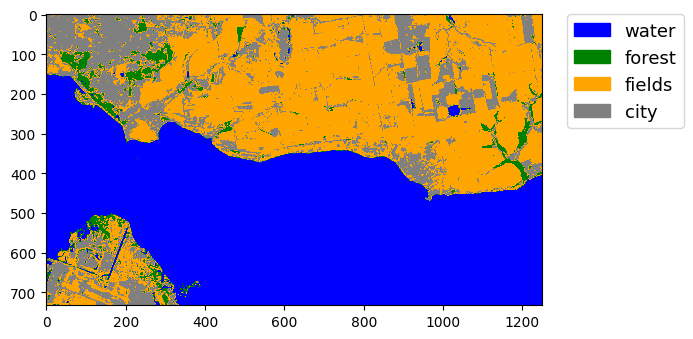

In [122]:
from matplotlib.colors import ListedColormap
import earthpy.plot as ep
import matplotlib.pyplot as plt

im = plt.imshow(image_1_multi_preds_img,
           vmin=1,vmax=6,
               cmap=ListedColormap(['blue', 'green', 'orange', 'grey', 'yellow','brown']))
ep.draw_legend(im_ax = im, titles = ["water","forest","fields","city"])


plt.show()